In [3]:
import us
import pandas as pd
import geopandas
import numpy as np

from shapely.geometry import Point
from geopandas.plotting import plot_point_collection
from litecoder.models import WOFLocality

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.style.use('seaborn-muted')

In [14]:
rows = []
for loc in WOFLocality.clean_us_cities():
    rows.append((loc.name, loc.us_state_abbr, loc.longitude, loc.latitude, loc.population))

In [15]:
df = pd.DataFrame(rows, columns=('name', 'state', 'longitude', 'latitude', 'population'))

In [16]:
df.head(10)

,name,state,longitude,latitude,population
0,Valley Head,AL,-85.621354,34.557517,558.0
1,Sylvania,AL,-85.804804,34.562109,1837.0
2,Shiloh,AL,-85.877994,34.463763,274.0
3,Rainsville,AL,-85.843520,34.493782,4948.0
4,Powell,AL,-85.897879,34.532534,NaN
5,Pine Ridge,AL,-85.780673,34.448890,282.0
6,Mentone,AL,-85.584222,34.566291,360.0
7,Lakeview,AL,-85.975703,34.391629,143.0
8,Tuscumbia,AL,-87.703381,34.721209,8423.0
9,Geraldine,AL,-86.003706,34.357721,896.0


In [17]:
df['point'] = df.apply(lambda r: Point(r.longitude, r.latitude), axis=1)

In [18]:
gdf = geopandas.GeoDataFrame(df, geometry='point')

In [19]:
states = geopandas.read_file('../data/cb_2017_us_state_5m/cb_2017_us_state_5m.shp')

In [34]:
def plot_state(state):
    ax = states[states.STUSPS==state].plot(color='white', edgecolor='black', figsize=(20,20))
    sdf = gdf[gdf.state==state]
    plot_point_collection(ax, sdf.point, markersize=sdf.population / 500, alpha=0.3, cmap='Reds', edgecolor='black')

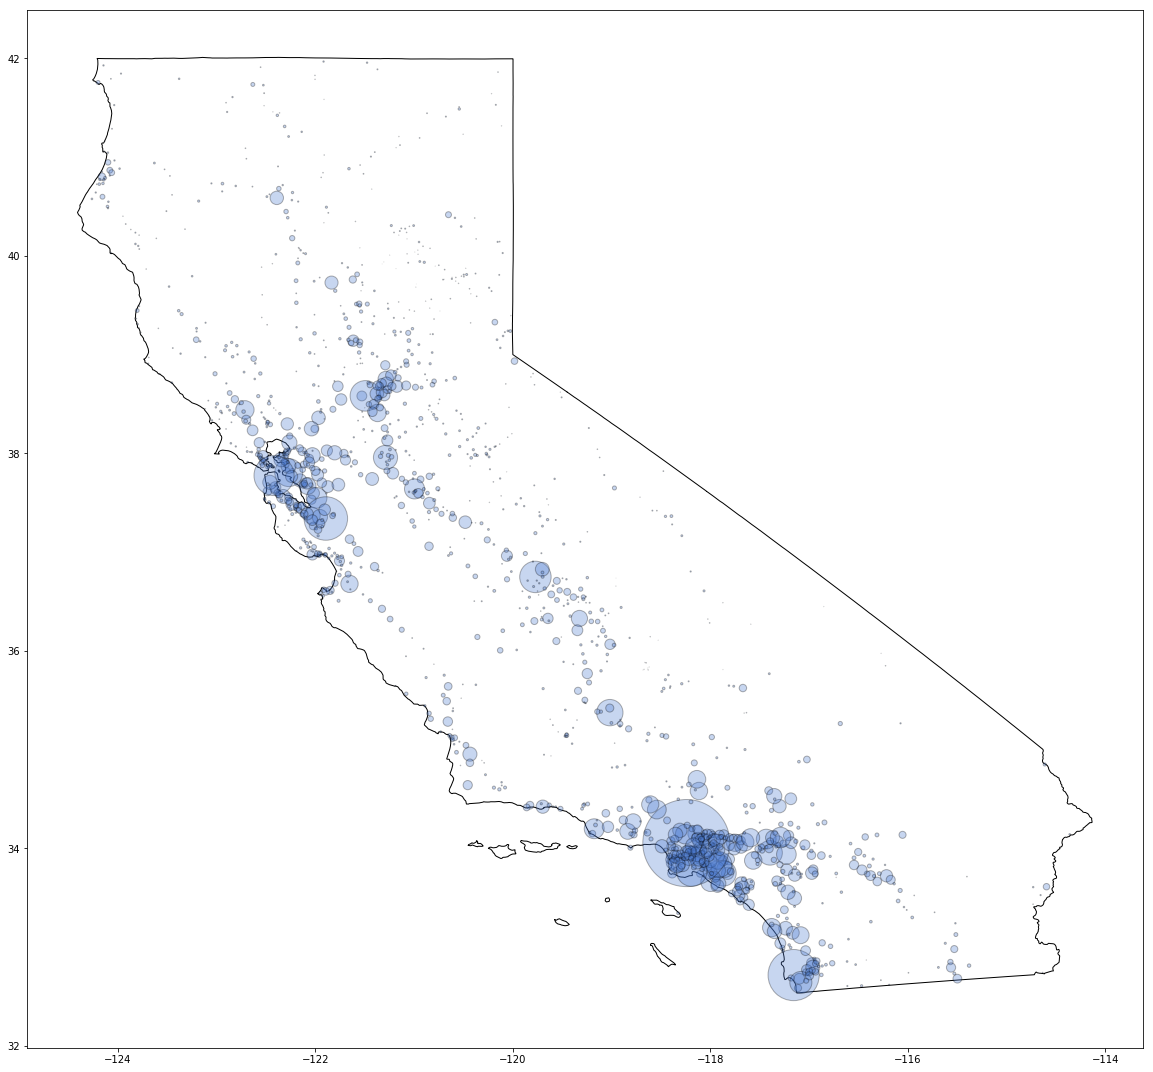

In [37]:
plot_state('CA')